In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'car_sales.csv' with the actual file path)
df = pd.read_csv('Car Sale.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None
         Car_id      Date Customer Name Gender  Annual Income

In [2]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price by dealer:\n", avg_price_by_dealer)


Average selling price by dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.5

In [3]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_by_brand = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Highest price variation by brand:\n", price_variation_by_brand)


Highest price variation by brand:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


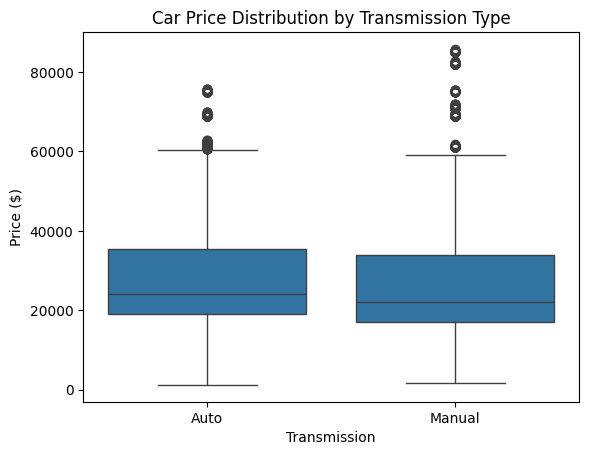

In [4]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Car Price Distribution by Transmission Type')
plt.show()


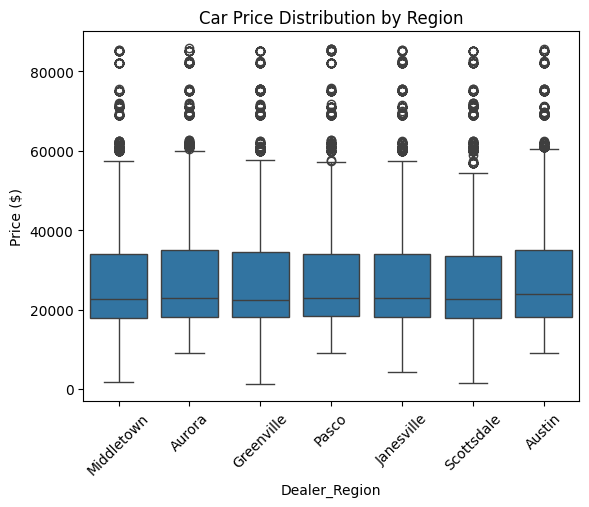

In [5]:
# 4. What is the distribution of car prices across different regions?
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution by Region')
plt.xticks(rotation=45)
plt.show()


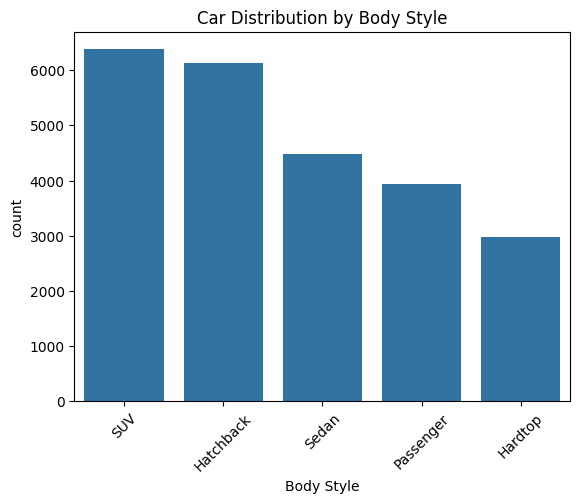

In [6]:
# 5. What is the distribution of cars based on body styles?
sns.countplot(x='Body Style', data=df, order=df['Body Style'].value_counts().index)
plt.title('Car Distribution by Body Style')
plt.xticks(rotation=45)
plt.show()


In [7]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
gender_income_price = df.groupby(['Gender'])[['Price ($)', 'Annual Income']].mean()
print("Average car price and annual income by gender:\n", gender_income_price)


Average car price and annual income by gender:
            Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207


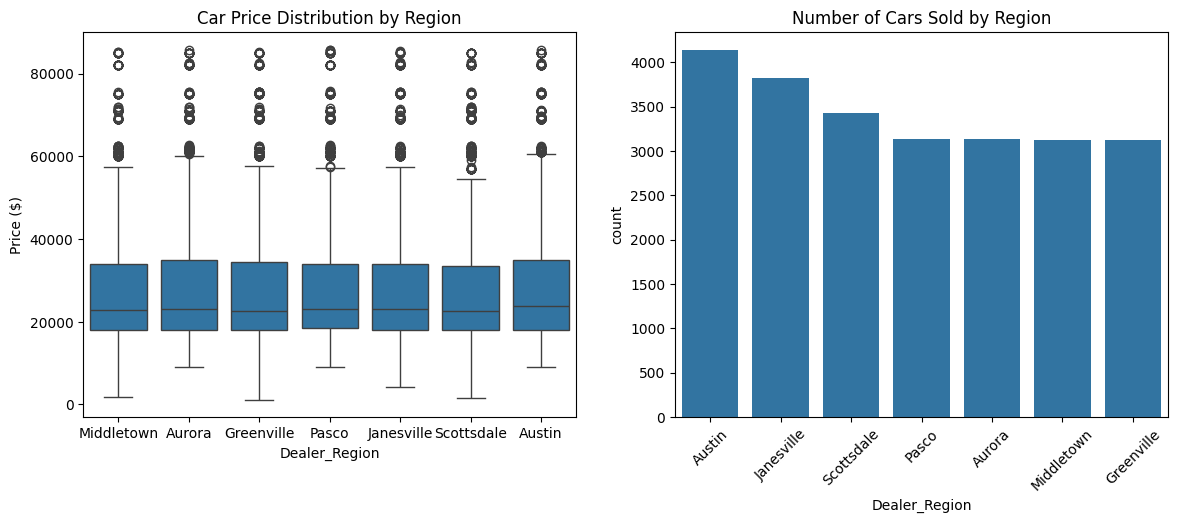

In [8]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, ax=ax[0])
sns.countplot(x='Dealer_Region', data=df, order=df['Dealer_Region'].value_counts().index, ax=ax[1])
ax[0].set_title('Car Price Distribution by Region')
ax[1].set_title('Number of Cars Sold by Region')
plt.xticks(rotation=45)
plt.show()


In [9]:
# 8. How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()
print("Average car price by engine size:\n", avg_price_by_engine)


Average car price by engine size:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


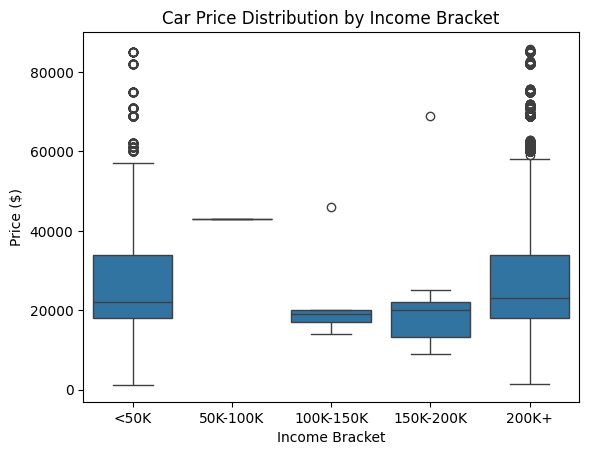

In [10]:
# 9. How do car prices vary based on the customer’s annual income bracket?
income_brackets = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, 200000, np.inf], labels=['<50K', '50K-100K', '100K-150K', '150K-200K', '200K+'])
df['Income Bracket'] = income_brackets
sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title('Car Price Distribution by Income Bracket')
plt.show()


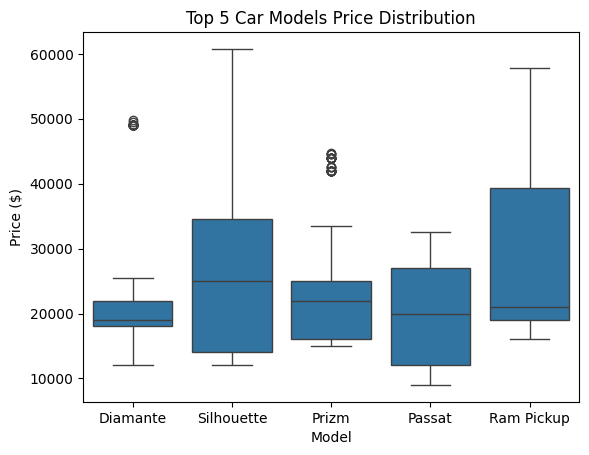

In [11]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df['Model'].value_counts().head(5).index
top_model_data = df[df['Model'].isin(top_models)]
sns.boxplot(x='Model', y='Price ($)', data=top_model_data, order=top_models)
plt.title('Top 5 Car Models Price Distribution')
plt.show()


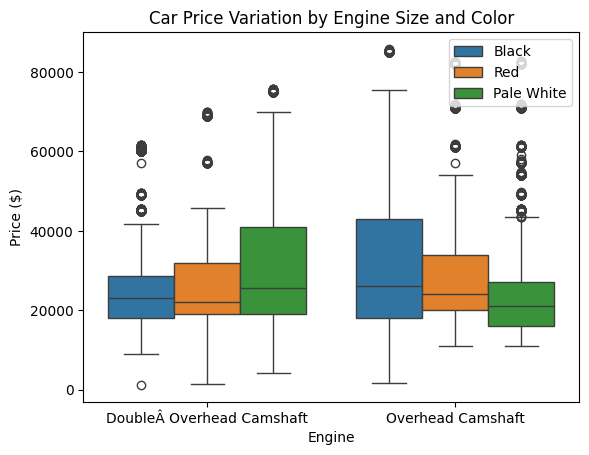

In [12]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Price Variation by Engine Size and Color')
plt.legend(loc='upper right')
plt.show()


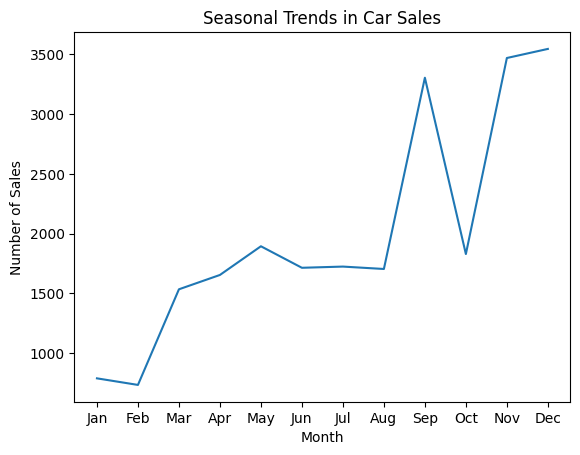

In [13]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sales_by_month = df['Month'].value_counts().sort_index()
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonal Trends in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


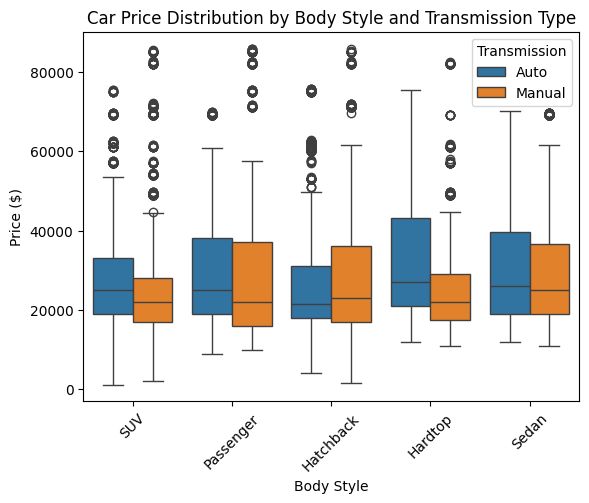

In [14]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.show()


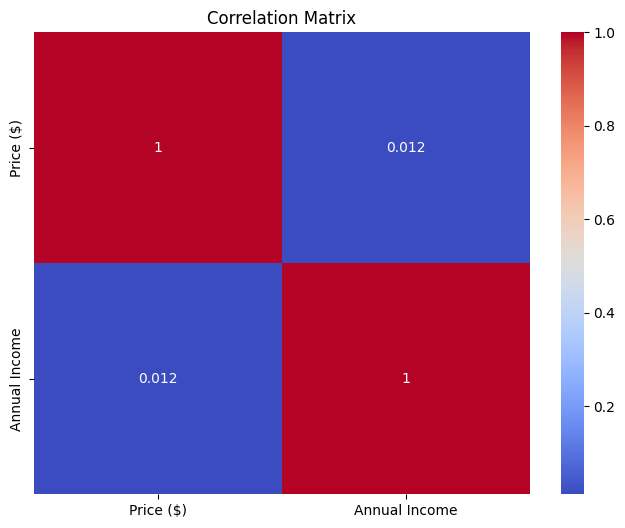

In [15]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price ($)', 'Annual Income']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print("Average car price by model and engine type:\n", avg_price_by_model_engine)


Average car price by model and engine type:
 Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64
